In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from math import exp,sqrt,fabs
def f(point):
    x = point[0]
    y = point[1]
    return ( 4*exp(-(x**2 + y**2 -2*(x+y-1))) + exp(-((x-3)**2 + (y-3)**2)) + exp(-((x+3)**2 + (y-3)**2)) + exp(-((x-3)**2 + (y+3)**2)) + exp(-((x+3)**2 + (y+3)**2)) )

def grad_f(point):
    x = point[0]
    y = point[1]
    return ( np.array(-2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((x - 3)*exp(12*(x + y)) + 4*(x - 1)*exp(8*(x + y + 2)) + (x + 3)*exp(12*y) + exp(12*x)*(x - 3) + x + 3), -2*exp(-x**2 - 6*x - y**2 - 6*y - 18)*((y - 3)*exp(12*(x + y)) + 4*(y - 1)*exp(8*(x + y + 2)) + exp(12*x)*(y + 3) + exp(12*y)*(y - 3) + y + 3)) )

def cost_function(point):
        return fabs(4 - f(point))

epsilon = 1e-5
max_iterations = 1e5
alpha = 0.1

In [289]:
def get_successors(point,alpha):
    x = point[0]
    y = point[1]
    sucessors = []
    sucessors.append(np.array([x + alpha,y]))
    sucessors.append(np.array([x - alpha,y]))
    sucessors.append(np.array([x,y + alpha]))
    sucessors.append(np.array([x,y - alpha]))
    sucessors.append(np.array([(x + alpha/sqrt(2),y + alpha/sqrt(2))]))
    sucessors.append(np.array([(x - alpha/sqrt(2),y + alpha/sqrt(2))]))
    sucessors.append(np.array([(x + alpha/sqrt(2),y - alpha/sqrt(2))]))
    sucessors.append(np.array([(x - alpha/sqrt(2),y - alpha/sqrt(2))]))
    return sucessors

def get_max_sucessor(point,alpha):
    sucessors = get_successors(point,alpha)
    max = -1
    index = -1
    for i, sucessor in enumerate(sucessors):
        if f(sucessor) > max:
            max = f(sucessor)
            index = i
    return sucessors[index]

In [39]:
for i in history:
    print(f(i))

0.18451178872457957
0.18453785738098408
0.18456393132324017
0.18459001055257165
0.18461609507020327
0.18464218487735912
0.184668279975264
0.18469438036514302
0.184720486048221
0.18474659702572385
0.18477271329887715
0.18479883486890705
0.1848249617370397
0.1848510939045016
0.18487723137251963
0.1849033741423203
0.1849295222151315
0.18495567559218035
0.18498183427469497
0.18500799826390318
0.18503416756103347
0.18506034216731393
0.18508652208397358
0.1851127073122417
0.18513889785334747
0.1851650937085203
0.18519129487899003
0.18521750136598686
0.18524371317074095
0.18526993029448285
0.18529615273844358
0.1853223805038542
0.18534861359194596
0.18537485200395032
0.1854010957410994
0.1854273448046251
0.1854535991957596
0.18547985891573573
0.1855061239657865
0.1855323943471447
0.18555867006104376
0.18558495110871764
0.18561123749139977
0.18563752921032467
0.18566382626672637
0.1856901286618395
0.1857164363968994
0.18574274947314065
0.18576906789179917
0.18579539165411013
0.1858217207613096

In [285]:
#  Gradient Descent
# current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
current = np.array([0,1])
iterations = 0
history = [current]
local_max = []

while not ((cost_function(current) < epsilon) or (iterations > max_iterations)):
        current = current + alpha * grad_f(current)
        history.append(current)
        iterations = iterations + 1
print(f"(x,y) = {current}\nvalue = {f(current)}")

(x,y) = [1.00986052 2.00986052]
value = 1.449648912783069


In [297]:
# Hill Climbing
current = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
# current = Node(-1.5,-1.5)
iterations = 0
history = [current]
local_max = []

while not ((cost_function(current) < epsilon) or (iterations > max_iterations)):
    next = get_max_sucessor(current,alpha)
    if f(next) > f(current):
        # print(f"x = {current.x} y = {current.y} value = {current.value}")
        current = next
    else:
        local_max.append(current)
        break
    iterations+=1
    history.append(current)

print(f"(x,y) = {current}\nvalue = {f(current)}")

4.083880698844268


IndexError: index 1 is out of bounds for axis 0 with size 1

In [45]:
print(current)

x = 0.9994613054904149 y = 0.9998315999853057 value = 4.000333244973741


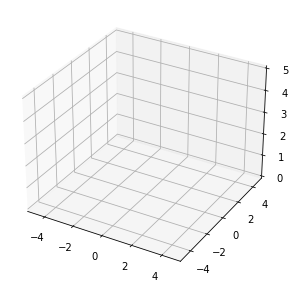

In [286]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(0,5)
for element in history:
    ax.plot3D(element[0],element[1],f(element))
plt.show()